구글 드라이브 마운트 해주세요!

In [ ]:
cctv_file = "/content/drive/MyDrive/ICT-COG/02. 데이터 분석/Ch 05. Data analyze/1. 인구수, CCTV, 범죄데이터 분석하기/data/01. CCTV_in_Seoul.csv"
pop_file  = "/content/drive/MyDrive/ICT-COG/02. 데이터 분석/Ch 05. Data analyze/1. 인구수, CCTV, 범죄데이터 분석하기/data/01. population_in_Seoul.xls"

# 1. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df_cctv = pd.read_csv(cctv_file)
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 1-1. 데이터를 불러왔으면 info() 부터 확인하자

In [ ]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


# 2. 컬럼명 변경하기
* rename 활용

In [ ]:
df_cctv = df_cctv.rename(columns={ "기관명": "구별" })
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


# 3. 엑셀파일 불러오기
* read_excel 함수 사용

In [ ]:
df_pop_seoul = pd.read_excel(pop_file)
df_pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


데이터를 불러오면서 엑셀의 컬럼, 행을 선택

In [ ]:
df_pop_seoul = pd.read_excel(pop_file,
                             header=2,  # 인덱스 2번째 데이터 부터 읽어 오기 위해 설정 - 3번째 행부터 읽어오기
                             usecols='B, D, G, J, N') # 사용할 컬럼의 알파벳 지정

df_pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


컬럼의 이름 수정

In [ ]:
df_pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 4. 간단하게 데이터 살펴보기

## 4-1. CCTV 데이터 살펴보기

In [ ]:
# CCTV가 많은 순으로 정렬하기
df_cctv.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [ ]:
# CCTV가 적은 순으로 정렬하기 - 오름차순으로 정렬
df_cctv.sort_values(by="소계", ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


CCTV 설치량은 매해 달라질 수가 있다.
* 단순한 개수만 세어진 데이터를 활용하는 것 보다, 각종 **비율정보**를 활용하는 것이 더 도움이 된다.

In [ ]:
# 최근 3년치 CCTV대수가 증가한 "최근증가율"을 구해보기 - (2014+2015+2016) / 2013
df_cctv["최근증가율"] = ( df_cctv['2014년'] + df_cctv['2015년'] + df_cctv['2016년'] ) / df_cctv['2013년도 이전'] * 100
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


CCTV 증가율이 제일 높은 순으로 정렬

In [ ]:
df_cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 4-2. 인구데이터 살펴보기

In [ ]:
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


구별로 확인을 해볼 것이기 때문에 "합계" 데이터는 별로 중요하지 않다.

In [ ]:
df_pop_seoul = df_pop_seoul.drop([0]) # 0번 인덱스 데이터 삭제하기
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


info()로 다시한번 확인

In [ ]:
df_pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


26개의 데이터가 있다고 합니다. - `26 entries` 하지만 실제 데이터의 개수는 25개래요(`25 non-null`)

In [ ]:
# 1. 구별 컬럼에 어떠한 데이터의 종류가 있는지를 파악
#  nan값이 있는지 파악해봐야 한다.
df_pop_seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

`isnull()`을 활용해서 구별 데이터가 NaN값인 행을 찾기

In [ ]:
df_pop_seoul[ df_pop_seoul["구별"].isnull() ]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [ ]:
# NaN값이 들어있는 행 제거
df_pop_seoul = df_pop_seoul.drop([26])
df_pop_seoul[df_pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자


In [ ]:
df_pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


# 5. 인구수 데이터에 추가적인 데이터 생성하기

In [ ]:
# 외국인 비율 & 고령자 비율 구하기
# 구별 CCTV의 설치 대수가 적절한지를 볼 것임 -> CCTV가 많이 설치 되었으면 동네가 안전한지를 확인하는게 우리의 최종 목적이니까.

# CCTV가 어떤 기준으로 많이 설치가 되었는지가 궁금
# 인구수 데이터를 통해서 알아 볼 것

# 1. 인구수 대비해서 CCTV가 많아질까요? - 당연한 이야기
# 2. 한국인 대비해서 CCTV가 많아질까요? - 당연한 이야기

# 3. 비교적 숫자가 적은 외국인과 고령자에 대비해서 CCTV가 많아질까요?

df_pop_seoul["외국인비율"] = df_pop_seoul["외국인"] / df_pop_seoul["인구수"] * 100
df_pop_seoul["고령자비율"] = df_pop_seoul["고령자"] / df_pop_seoul["인구수"] * 100

df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


외국인 수를 기준으로 정렬

In [ ]:
df_pop_seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


외국인 비율로 정렬하면?

In [ ]:
df_pop_seoul.sort_values(by="외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


CCTV와 인구수를 동시에 확인할 것이기 때문에, 두 데이터 프레임을 병합해서 확인

# 6. CCTV 데이터와 인구 현황 데이터를 합쳐서 분석

In [ ]:
data_result = pd.merge(df_cctv, df_pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 7. 필요 없는 컬럼 삭제
각 년도별로 얼마나 설치가 되었느냐는 중요하지 않다.
* 우리가 필요한 정보는 구별 CCTV의 **소계**가 중요하기 때문에,
* 2013, 2014, 2015, 2016 년도의 CCTV 대수를 통해 **최근증가율**을 구해냈기 때문에

In [ ]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. CCTV 소계의 상관관계 이야기 하기
* 어떠한 요건에 의해서(x) CCTV의 소계(y)가 결정이 되었는지를 확인
* 어떠한 데이터를 CCTV의 소계와 비교할지를 결정해 볼 것
  * 이러한 수치를 **상관관계**라고 합니다.
* 상관계수
  * 상관계수의 절대값이 0.1이하면 무시해도 되는 상관관계
  * 상관계수의 절대값이 0.1 ~ 0.3 정도면 약한 상관관계
  * 상관계수의 절대값이 0.3 ~ 0.7 정도면 뚜렷한 상관관계
  * 상관계수의 절대값이 0.7 ~ 1.0 정도면 강한 상관관계

In [ ]:
import numpy as np

In [ ]:
data_result["고령자비율"].shape, data_result["소계"].shape, 

((25,), (25,))

In [ ]:
# 상관계수를 numpy로 구해보기
# 고령자 비율에 대한 소계의 상관관계 - 고령자 비율이 커지면, CCTV의 대수도 많아질까?
np.corrcoef(data_result["고령자비율"], data_result["소계"])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

고령자 비율과 CCTV 소계를 확인해 보니까 음의 상관관계를 띄고 있는것을 알 수 있어요.

In [ ]:
# 외국인 비율에 대한 소계의 상관관계
np.corrcoef(data_result["외국인비율"], data_result["소계"])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

외국인비율도 고령자비율과 비슷하게 음의 상관관계를 가지지만, 고령자 비율의 상관계수가 더 높다.

In [ ]:
np.corrcoef(data_result["인구수"], data_result["소계"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

# 9. 시각화로 알아보기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (45.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

위 코드 실행해서 한글 폰트 다운이 완료 됐으면 상단 메뉴의 런타임 - 런타임 다시 시작 - 런타임 - 모두 실행

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
data_result = data_result.set_index("구별")
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

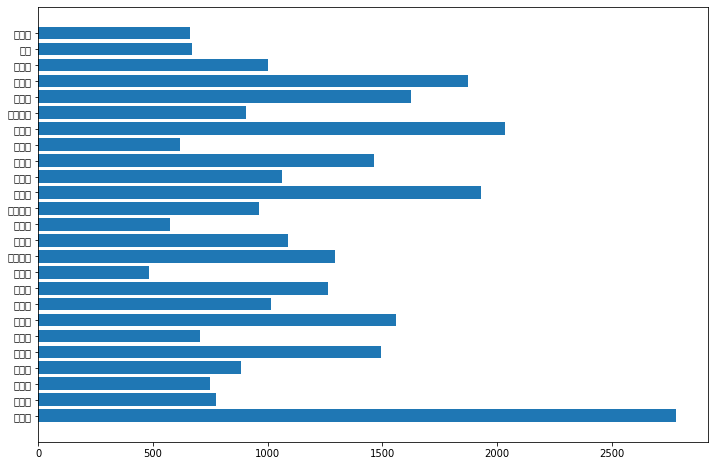

In [ ]:
# bar 그래프로 소계 보기
plt.figure(figsize=(12, 8))
plt.barh(data_result.index, data_result['소계'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

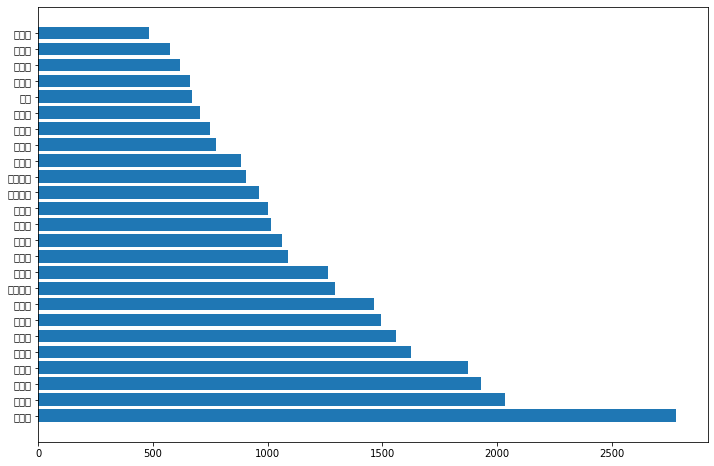

In [ ]:
# 소계 순으로 정렬해서 확인
data_result_sorted = data_result.sort_values(by="소계", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(data_result_sorted.index, data_result_sorted['소계'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

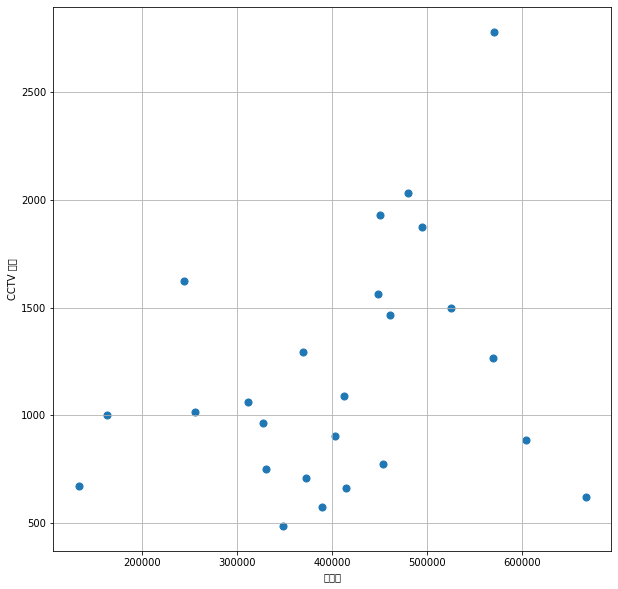

In [ ]:
# 산점도 scatter로 확인하기
plt.figure(figsize=(10, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV 소계")
plt.grid()
plt.show()

## seaborn 의 lmplot 활용하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

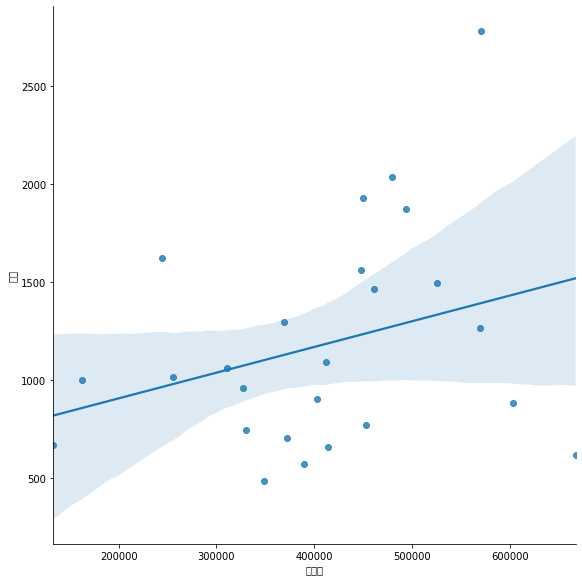

In [ ]:
import seaborn as sns
sns.lmplot(x="인구수", y="소계", height=8, data=data_result)
plt.show()

`np.polyfit(x, y, 1)`은 따로 공부하거나 걱정하지 마세요!

* `x` : x축에 들어갈 데이터 $y=f(x)$에서 x를 의미
* `y` : x의 기울기와 절편을 구할 기준 데이터(x의 결과물)
* `1` : 1차식으로 만들겠다.

In [ ]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # 인구수와 소계에 대한 1차식을 생성
fp1

array([1.30916415e-03, 6.45066497e+02])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

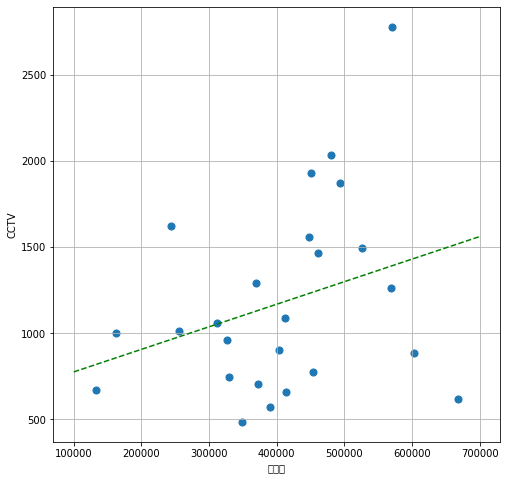

In [ ]:
# 구해진 기울기와 절편을 이용해서 1차 함수를 만든다.
f1 = np.poly1d(fp1) # y 축 데이터 만들기 -> 결과로써 y = fp1[0]*x + fp1[1]
fx = np.linspace(100000, 700000, 100) # 100000만 부터 700000까지 100을 띄워가면서 숫자 생성

# 그래프 사이즈 조절하기
plt.figure(figsize=(8, 8))

# 산점도
plt.scatter(data_result['인구수'], data_result['소계'], s=50)

# polyfit, poly1d로 구한 직선 (f1) 그리기 y = f1(fx) -> y = f(x)
y = f1(fx)
plt.plot(fx, y, color='g', linestyle='dashed')

plt.xlabel("인구수")
plt.ylabel("CCTV")

plt.grid()
plt.show()

인구수와 적정 CCTV가 가장 차이가 많이나는 구 순으로 정렬하기

In [ ]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1) # CCTV 기준치 구하기
fx = np.linspace(100000, 700000, 100)

# np.abs : 절대값 np.abs(1) : 1 / np.abs(-1) : 1
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # 그냥 인구수를 빼는게 아닌, 인구수 데이터가 실제로 들어 갔을 때
                                                                              # 적절하게 설치 되어 있어야 할 CCTV 대수를 빼준다. ( 직선 위의 점 )


# 오차 내림차순으로 정렬
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

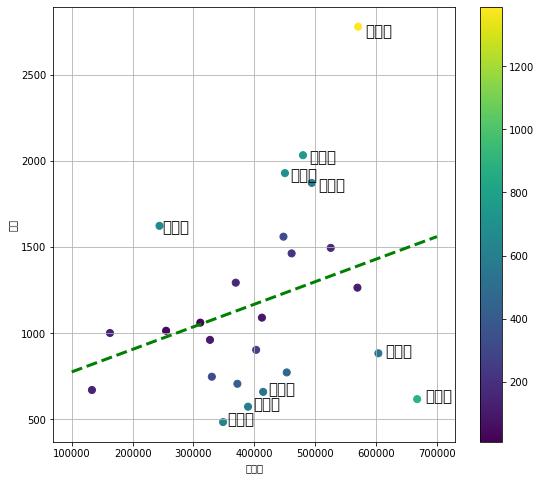

In [ ]:
# 텍스트와 컬러맵 입히기
plt.figure(figsize=(9, 8))
plt.scatter(df_sort['인구수'], df_sort['소계'], c=df_sort['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 오차가 가장 큰 10개의 구에 대해서 텍스트를 부여
for n in range(10):
  # scatter가 찍힌 좌표를 기준으로 약간 오른쪽( 인구수보다 약간 큼 ) 아래 ( 소계 보다 약간 작음 )
  plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel("인구수")
plt.ylabel("소계")

plt.colorbar()
plt.grid()
plt.show()

최종 파일 저장

In [ ]:
data_result.to_csv("./pop_cctv_result.csv", encoding='utf-8')